# selenium을 이용한 오피넷 데이터 수집

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import json
import folium
import warnings
import numpy as np

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=Service("../driver/chromedriver"))

url = "https://www.opinet.co.kr/searRgSelect.do"
driver.get(url)

In [4]:
driver.get(url)

In [5]:
from selenium.webdriver.common.by import By

sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + ". " + sido_name.get_attribute("value"))

0. 
1. 서울특별시
2. 부산광역시
3. 대구광역시
4. 인천광역시
5. 광주광역시
6. 대전광역시
7. 울산광역시
8. 세종특별자치시
9. 경기도
10. 강원특별자치도
11. 충청북도
12. 충청남도
13. 전북특별자치도
14. 전라남도
15. 경상북도
16. 경상남도
17. 제주특별자치도


In [6]:
sido_names = []

for sido_name in sido_list:
    sido_names.append(sido_name.get_attribute("value"))

sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [7]:
sido_names = sido_names[1:]

sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [8]:
len(sido_names)

17

In [9]:
sido.send_keys(sido_names[0])

#### Test

In [61]:
# gu_list = []

# gu = driver.find_element(By.ID, "SIGUNGU_NM0")
# gu_names = gu.find_elements(By.TAG_NAME, "option")

# for gu_name in gu_names:
#     gu_list.append(gu_name.get_attribute("value"))

# gu_list = gu_list[1:]
# print(len(gu_list), gu_list)

# gu.send_keys(gu_list[0])

25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [11]:
# gu_names = []

# gu = driver.find_element(By.ID, "SIGUNGU_NM0")
# gu_list = gu.find_elements(By.TAG_NAME, "option")

# for gu_name in gu_list:
#     gu_names.append(gu_name.get_attribute("value"))

# gu_names = gu_names[1:]
# print(len(gu_names), gu_names)

In [12]:
# sido.send_keys(sido_names[0])

In [13]:
# gu.send_keys(gu_names[0])

In [ ]:
# gas_station_body = driver.find_element(By.ID, "body1")
# gas_station_tags = gas_station_body.find_elements(By.TAG_NAME, "a")
# gas_station_tags[0].click()

#### 상표, 주유소명, 주소, 유종별 가격, 부가정보 확인 (현재위치:서울-강남구/지에스칼텍스)

In [ ]:
# trademark_driver = driver.find_element(By.ID, "os_title_icon")
# trademark = trademark_driver.get_attribute("src")

# print(type(trademark))
# print(trademark)

<class 'str'>
https://www.opinet.co.kr/images/user/com/icon_hy.gif


In [ ]:
# gas_station_driver = driver.find_element(By.ID, "os_nm")
# gas_station = gas_station_driver.text

# print(type(gas_station))
# print(gas_station)

<class 'str'>
극동유화㈜ 개나리주유소


In [279]:
# premium_oil_driver = driver.find_element(By.ID, "b034_p")
# premium_oil = premium_oil_driver.text


# print(premium_oil)

2,089


In [181]:
# nomal_oil_driver = driver.find_element(By.ID, "b027_p")
# nomal_oil = nomal_oil_driver.text

# print(nomal_oil)

1,719


In [182]:
# diesel_driver = driver.find_element(By.ID, "d047_p")
# diesel = diesel_driver.text

# print(diesel)

1,699


In [329]:
# car_wash_driver = driver.find_element(By.ID, "cwsh_yn")
# car_wash_check = car_wash_driver.get_attribute("src")

# print(car_wash_check)

# # type(car_wash_check)

# if car_wash_check[-7:-4] == "off":
#     car_wash = False
# else:
#     car_wash = True

# print(car_wash)

True


In [330]:
# charging_driver = driver.find_element(By.ID, "lpg_yn")
# charging_check = charging_driver.get_attribute("src")

# print(charging_check)

# charging_check[-7:-4]

# if charging_check[-7:-4] == "off":
#     charging = False
# else:
#     charging = True

# print(charging)

False


In [331]:
# maintenance_driver = driver.find_element(By.ID, "maint_yn")
# maintenance_check = maintenance_driver.get_attribute("src")

# print(maintenance_check)

# maintenance_check[-7:-4]

# if maintenance_check[-7:-4] == "off":
#     maintenance = False
# else:
#     maintenance = True

# print(maintenance)

True


In [332]:
# convenience_driver = driver.find_element(By.ID, "cvs_yn")
# convenience_check = convenience_driver.get_attribute("src")

# print(convenience_check)

# convenience_check[-7:-4]

# if convenience_check[-7:-4] == "off":
#     convenience = False
# else:
#     convenience = True

# print(convenience)

https://www.opinet.co.kr/images/user/gis/oil_station_service1_04_off.gif
False


In [187]:
# open_24h_driver = driver.find_element(By.ID, "sel24_yn")
# open_24h_check = open_24h_driver.get_attribute("src")

# print(open_24h_check)
# open_24h_check[-7:-4]

# if open_24h_check[-7:-4] == "off":
#     open_24h = False
# else:
#     open_24h = True

# print(open_24h)

https://www.opinet.co.kr/images/user/gis/oil_station_service1_05_off.gif
False


In [ ]:
# import time

# click_position_drive = driver.find_element(By.ID, "body1")
# click_position = click_position_drive.find_element(By.ID, "price")
# click_position.click()
# time.sleep(0.5)

# click_position_drive = driver.find_element(By.ID, "body1")
# scroll_element = click_position_drive.find_element(By.ID, "price")
# driver.execute_script("")

In [ ]:
# import time

# # click_position_driver = driver.find_element(By.ID, "body1")
# # click_position = click_position_driver.find_element(By.TAG_NAME, "span")
# # click_position.click()
# # time.sleep(0.5)

# driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

In [ ]:
# scroll_element = driver.find_element(By.ID, "body1")
# # scroll_element = scroll_element_driver.find_element(By.TAG_NAME, "span")

# # 스크롤을 조금씩 여러 번 내려서 전체 리스트 보기
# for _ in range(5):  # 10번 반복하여 스크롤
#     driver.execute_script("arguments[0].scrollTop += 200;", scroll_element)
#     time.sleep(0.5)  # 페이지가 로드될 시간을 기다림

##### <span style="color:red;">스크롤 인자 받는 것 이해안됨</span>

In [ ]:
# import time

# scroll_element = driver.find_element(By.ID, "os_price1")

# # 스크롤을 조금씩 내리기
# for _ in range(1):  # 5번 반복하여 스크롤
#     driver.execute_script("arguments[0].scrollTop += 200;", scroll_element)
#     time.sleep(0.5)  # 페이지 로드 대기

#### 휘발유리스트 모두 방문하기

In [ ]:
# gas_station_body = driver.find_element(By.ID, "body1")
# gas_station_tags = gas_station_body.find_elements(By.TAG_NAME, "a")
# gas_station_tags[1].click()

In [ ]:
# import time

# gas_station_body = driver.find_element(By.ID, "body1")
# gas_stations = gas_station_body.find_elements(By.TAG_NAME, "tr")

# for gas_station in gas_stations:
#     gas_station_tag = gas_station.find_element(By.TAG_NAME, "a")
#     gas_station_tag.click()
#     time.sleep(0.5)
     

### 서울 모든 구 방문

In [10]:
gu_list = []

gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_names = gu.find_elements(By.TAG_NAME, "option")

for gu_name in gu_names:
    gu_list.append(gu_name.get_attribute("value"))

gu_list = gu_list[1:]
print(len(gu_list), gu_list)

gu.send_keys(gu_list[0])

25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [11]:
gas_station_body = driver.find_element(By.ID, "body1")
gas_station_tags = gas_station_body.find_elements(By.TAG_NAME, "a")
gas_station_tags[0].click()

In [ ]:
# gu = driver.find_element(By.ID, "SIGUNGU_NM0")
# gu_names = gu.find_elements(By.TAG_NAME, "option")

# for idx, gu_name in enumerate(gu_list):
#     gu = driver.find_element(By.ID, "SIGUNGU_NM0")

#     gu.send_keys(gu_name)
#     time.sleep(0.5)
        
#     driver.implicitly_wait(5)
#     driver.refresh()  


### 이제 합치자

In [ ]:
# gu = driver.find_element(By.ID, "SIGUNGU_NM0")
# gu_names = gu.find_elements(By.TAG_NAME, "option")

# for idx, gu_name in enumerate(gu_list):
#     gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    
#     gu.send_keys(gu_name)
#     time.sleep(1)

#     gas_station_body = driver.find_element(By.ID, "body1")
#     gas_stations = gas_station_body.find_elements(By.TAG_NAME, "tr")

#     for gas_station in gas_stations:
#         gas_station_tag = gas_station.find_element(By.TAG_NAME, "a")
#         gas_station_tag.click()
#         time.sleep(0.5)

KeyboardInterrupt: 

### 주유소마다 유종이 다르다. 다시 체크

In [20]:
# price_list = []

# price_body = driver.find_element(By.ID, "infoTbody")
# prices = price_body.find_elements(By.TAG_NAME, "tr")

# for price in prices:
#     price_dict = {}

#     if "고급휘발유" in price.text:
#         price_value1 = price.find_element(By.ID, "b034_p")
#         price_dict["고급휘발유"] = price_value1.text
#     if "보통휘발유" in price.text:
#         price_value2 = price.find_element(By.ID, "b027_p")
#         price_dict["보통휘발유"] = price_value2.text
#     if "경유" in price.text:
#         price_value3 = price.find_element(By.ID, "d047_p")
#         price_dict["경유"] = price_value3.text
#     if "실내등유" in price.text:
#         price_value4 = price.find_element(By.ID, "c004_p")
#         price_dict["실내등유"] = price_value4.text
        
#     if not price_dict:
#         continue
    
#     price_list.append(list(price_dict.items()))

# print(price_list)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="infoTbody"]"}
  (Session info: chrome=134.0.6998.35); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x5b7f7ff0446a <unknown>
#1 0x5b7f7f9bded0 <unknown>
#2 0x5b7f7fa0f935 <unknown>
#3 0x5b7f7fa0fb61 <unknown>
#4 0x5b7f7fa5e9d4 <unknown>
#5 0x5b7f7fa3588d <unknown>
#6 0x5b7f7fa5bceb <unknown>
#7 0x5b7f7fa35633 <unknown>
#8 0x5b7f7fa011be <unknown>
#9 0x5b7f7fa02981 <unknown>
#10 0x5b7f7feca86b <unknown>
#11 0x5b7f7fece73c <unknown>
#12 0x5b7f7feb1f12 <unknown>
#13 0x5b7f7fecf2b4 <unknown>
#14 0x5b7f7fe960af <unknown>
#15 0x5b7f7fef2ad8 <unknown>
#16 0x5b7f7fef2cb6 <unknown>
#17 0x5b7f7ff032e6 <unknown>
#18 0x7ad294a94ac3 <unknown>


In [355]:
# a = {}

# if not a:
#     print("!!")

!!


In [302]:
# price_body = driver.find_element(By.ID, "infoTbody")
# prices = price_body.find_elements(By.TAG_NAME, "tr")[0]
# price = prices.find_element(By.ID, "b034_p")

# print(price.text)

# print(prices.text[:5])

# if "고급휘발유" in prices.text:
#     print("111")



1,914
고급휘발유
111


In [289]:
# price_body = driver.find_element(By.ID, "infoTbody")
# prices = price_body.find_elements(By.TAG_NAME, "tr")
# print(prices[1].text)

# if "고급휘발유" in prices[0].text:
#     print("111")

보통휘발유 1,749원 2025-03-06　　17:56:00
111


In [290]:
# price_body = driver.find_element(By.ID, "infoTbody")
# prices = price_body.find_elements(By.TAG_NAME, "tr")
# print(prices[2].text)

# if "고급휘발유" in prices[0].text:
#     print("111")

경유 1,664원 2025-03-06　　16:28:36
111


In [291]:
# price_body = driver.find_element(By.ID, "infoTbody")
# prices = price_body.find_elements(By.TAG_NAME, "tr")
# print(prices[3].text)

# if "고급휘발유" in prices[0].text:
#     print("111")

실내등유 1,640원 2025-03-06　　14:50:58
111


In [307]:
# a = {}
# a["이름"] = price_value.text

# print(a)

{'이름': '1,914'}


#### 그리고 이번에는 list에 저장까지!

In [31]:
# additional_info_list = [] # 상표주소, 주유소명, 세차장, 충전소, 경정비, 편의점, 24시영업

# trademark_driver = driver.find_element(By.ID, "os_title_icon")
# additional_info_list.append((trademark_driver.get_attribute("src")))


# gas_station_driver = driver.find_element(By.ID, "os_nm")
# additional_info_list.append((gas_station_driver.text))


# car_wash_driver = driver.find_element(By.ID, "cwsh_yn")
# car_wash_check = car_wash_driver.get_attribute("src")

# if car_wash_check[-7:-4] == "off":
#     additional_info_list.append(False)
# else:
#     additional_info_list.append(True)
    

# charging_driver = driver.find_element(By.ID, "lpg_yn")
# charging_check = charging_driver.get_attribute("src")

# if charging_check[-7:-4] == "off":
#     additional_info_list.append(False)
# else:
#     additional_info_list.append(True)


# maintenance_driver = driver.find_element(By.ID, "maint_yn")
# maintenance_check = maintenance_driver.get_attribute("src")

# if maintenance_check[-7:-4] == "off":
#     additional_info_list.append(False)
# else:
#     additional_info_list.append(True)


# convenience_driver = driver.find_element(By.ID, "cvs_yn")
# convenience_check = convenience_driver.get_attribute("src")

# if convenience_check[-7:-4] == "off":
#     additional_info_list.append(False)
# else:
#     additional_info_list.append(True)


# open_24h_driver = driver.find_element(By.ID, "sel24_yn")
# open_24h_check = open_24h_driver.get_attribute("src")
# if open_24h_check[-7:-4] == "off":
#     additional_info_list.append(False)
# else:
#     additional_info_list.append(True)

# print(additional_info_list)

['https://www.opinet.co.kr/images/user/com/icon_gs.gif', '지에스칼텍스㈜ 은마주유소', True, False, True, False, False]


In [ ]:
# total_detail_list = price_list + additional_info_list
# print(total_detail_list)

[[('고급휘발유', '1,885')], [('보통휘발유', '1,638')], [('경유', '1,513')], 'https://www.opinet.co.kr/images/user/com/icon_hy.gif', '㈜CW창원', True, False, True, False, False]


### 함수로 상세정보 값 return 구현

In [ ]:
def get_total_detail_list(driver):
    price_list = [] # 고급휘발유, 보통휘발유, 경유, 실내등유 등 dict으로 저장

    price_body = driver.find_element(By.ID, "infoTbody")
    prices = price_body.find_elements(By.TAG_NAME, "tr")

    for price in prices:
        price_dict = {}

        if "고급휘발유" in price.text:
            price_value1 = price.find_element(By.ID, "b034_p")
            price_dict["고급휘발유"] = price_value1.text

        if "보통휘발유" in price.text:
            price_value2 = price.find_element(By.ID, "b027_p")
            price_dict["보통휘발유"] = price_value2.text
        
        if "경유" in price.text:
            price_value3 = price.find_element(By.ID, "d047_p")
            price_dict["경유"] = price_value3.text

        if "실내등유" in price.text:
            price_value4 = price.find_element(By.ID, "c004_p")
            price_dict["실내등유"] = price_value4.text

        if not price_dict:
            continue
        
        price_list.append(list(price_dict.items()))
    
    #############

    additional_info_list = [] # 상표주소, 주유소명, 세차장, 충전소, 경정비, 편의점, 24시영업

    trademark_driver = driver.find_element(By.ID, "os_title_icon")
    additional_info_list.append((trademark_driver.get_attribute("src")))

    gas_station_driver = driver.find_element(By.ID, "os_nm")
    additional_info_list.append((gas_station_driver.text))


    car_wash_driver = driver.find_element(By.ID, "cwsh_yn")
    car_wash_check = car_wash_driver.get_attribute("src")

    if car_wash_check[-7:-4] == "off":
        additional_info_list.append(False)
    else:
        additional_info_list.append(True)
        

    charging_driver = driver.find_element(By.ID, "lpg_yn")
    charging_check = charging_driver.get_attribute("src")

    if charging_check[-7:-4] == "off":
        additional_info_list.append(False)
    else:
        additional_info_list.append(True)


    maintenance_driver = driver.find_element(By.ID, "maint_yn")
    maintenance_check = maintenance_driver.get_attribute("src")

    if maintenance_check[-7:-4] == "off":
        additional_info_list.append(False)
    else:
        additional_info_list.append(True)


    convenience_driver = driver.find_element(By.ID, "cvs_yn")
    convenience_check = convenience_driver.get_attribute("src")

    if convenience_check[-7:-4] == "off":
        additional_info_list.append(False)
    else:
        additional_info_list.append(True)


    open_24h_driver = driver.find_element(By.ID, "sel24_yn")
    open_24h_check = open_24h_driver.get_attribute("src")
    if open_24h_check[-7:-4] == "off":
        additional_info_list.append(False)
    else:
        additional_info_list.append(True)

    total_detail_list = price_list + additional_info_list
    
    #########

    address_brand_driver = driver.find_element(By.CLASS_NAME, "gis_detail_info_bcon")
    address_driver = address_brand_driver.find_element(By.ID, "rd_addr")
    total_detail_list.append(address_driver.text) # 주소

    brand_driver = address_brand_driver.find_element(By.ID, "poll_div_nm")
    total_detail_list.append(brand_driver.text) # 상표
    
    return total_detail_list

In [14]:
# address_brand_driver = driver.find_element(By.CLASS_NAME, "gis_detail_info_bcon")
# address_driver = address_brand_driver.find_element(By.ID, "rd_addr")
# print(address_driver.text)

# brand_driver = address_brand_driver.find_element(By.ID, "poll_div_nm")
# print(brand_driver.text)

서울 강남구 도곡로 208
HD현대오일뱅크


### "강남구"에서 주유소 체크

In [ ]:
# from tqdm.notebook import tqdm

# gu_detail_list = []

# gas_station_body = driver.find_element(By.ID, "body1")
# gas_stations = gas_station_body.find_elements(By.TAG_NAME, "tr")

# for idx, gas_station in tqdm(enumerate(gas_stations), total=len(gas_stations)):
#     gas_station_tag = gas_station.find_element(By.TAG_NAME, "a")
#     gas_station_tag.click()
#     time.sleep(0.5)

#     gu_detail = get_total_detail_list(driver)
#     gu_detail_list.append(gu_detail)
     
# print(gu_detail_list)

  0%|          | 0/30 [00:00<?, ?it/s]

[[[('고급휘발유', '1,919'), ('보통휘발유', False), ('경유', False), ('실내등유', False)], [('고급휘발유', False), ('보통휘발유', '1,719'), ('경유', False), ('실내등유', False)], [('고급휘발유', False), ('보통휘발유', False), ('경유', '1,699'), ('실내등유', False)], [('고급휘발유', False), ('보통휘발유', False), ('경유', False), ('실내등유', False)], [('고급휘발유', False), ('보통휘발유', False), ('경유', False), ('실내등유', False)], 'https://www.opinet.co.kr/images/user/com/icon_gs.gif', '지에스칼텍스㈜ 은마주유소', True, False, True, False, False], [[('고급휘발유', '1,899'), ('보통휘발유', False), ('경유', False), ('실내등유', False)], [('고급휘발유', False), ('보통휘발유', '1,719'), ('경유', False), ('실내등유', False)], [('고급휘발유', False), ('보통휘발유', False), ('경유', '1,638'), ('실내등유', False)], [('고급휘발유', False), ('보통휘발유', False), ('경유', False), ('실내등유', False)], [('고급휘발유', False), ('보통휘발유', False), ('경유', False), ('실내등유', False)], 'https://www.opinet.co.kr/images/user/com/icon_sk.gif', '오일프러스 셀프', True, False, True, False, True], [[('고급휘발유', '1,899'), ('보통휘발유', False), ('경유', False), ('실내등유', False)], [('고

In [117]:
# from tqdm.notebook import tqdm

# gu_detail_list = []

# gas_station_body = driver.find_element(By.ID, "body1")
# gas_stations = gas_station_body.find_elements(By.TAG_NAME, "tr")
# gas_stations_test = gas_stations[:11]

# for idx, gas_station in tqdm(enumerate(gas_stations_test), total=len(gas_stations_test)):
#     gas_station_tag = gas_station.find_element(By.TAG_NAME, "a")
#     gas_station_tag.click()
#     time.sleep(0.5)

#     gu_detail = get_total_detail_list(driver)
#     gu_detail_list.append(gu_detail)
     
# print(gu_detail_list)

  0%|          | 0/11 [00:00<?, ?it/s]

[[[('고급휘발유', '1,919')], [('보통휘발유', '1,719')], [('경유', '1,699')], 'https://www.opinet.co.kr/images/user/com/icon_gs.gif', '지에스칼텍스㈜ 은마주유소', True, False, True, False, False], [[('고급휘발유', '1,899')], [('보통휘발유', '1,719')], [('경유', '1,638')], 'https://www.opinet.co.kr/images/user/com/icon_sk.gif', '오일프러스 셀프', True, False, True, False, True], [[('고급휘발유', '1,899')], [('보통휘발유', '1,719')], [('경유', '1,638')], 'https://www.opinet.co.kr/images/user/com/icon_hy.gif', 'HD현대오일뱅크㈜직영 강남셀프주유소', True, False, False, False, False], [[('고급휘발유', '1,928')], [('보통휘발유', '1,728')], [('경유', '1,589')], 'https://www.opinet.co.kr/images/user/com/icon_sk.gif', '(주)보성 세곡주유소', True, False, False, False, False], [[('보통휘발유', '1,737')], [('경유', '1,609')], 'https://www.opinet.co.kr/images/user/com/icon_gs.gif', '방죽주유소', True, False, False, False, False], [[('고급휘발유', '1,879')], [('보통휘발유', '1,739')], [('경유', '1,638')], 'https://www.opinet.co.kr/images/user/com/icon_hy.gif', 'HD현대오일뱅크㈜직영 도곡셀프주유소', True, False, True, False, Fals

In [ ]:
# len(gu_detail_list)

30

In [101]:
# # price_list = [] # 고급휘발유, 보통휘발유, 경유, 실내등유

# price_body = driver.find_element(By.ID, "infoTbody")
# prices = price_body.find_elements(By.TAG_NAME, "tr")

# print(len(prices))
# price_list = []


# for price in prices:
#     if price.get_attribute("style") == "display: none;":
#         continue

#     if "고급휘발유" in price.text:
#         price_value1 = price.find_element(By.ID, "b034_p")
#         price_list.append(price_value1.text)
#     elif "보통휘발유" in price.text:
#         price_value2 = price.find_element(By.ID, "b027_p")
#         price_list.append(price_value2.text)
#     elif "경유" in price.text: 
#         price_value3 = price.find_element(By.ID, "d047_p")
#         price_list.append(price_value2.text)
#     elif "실내등유" in price.text:
#         price_value4 = price.find_element(By.ID, "c004_p")
#         price_list.append(price_value4.text)
#     else:
#         price_list.append(False)

       
# print(price_list)

5
['1,899', '1,719', '1,719']


### 이제 합쳐서!

In [16]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_names = gu.find_elements(By.TAG_NAME, "option")

gu_total_list = []

for gu_idx, gu_name in tqdm(enumerate(gu_list), total=len(gu_list)):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")

    gu.send_keys(gu_name)
    time.sleep(0.5)

    driver.implicitly_wait(5)
    driver.refresh()  
        
    gu_detail_list = []

    gas_station_body = driver.find_element(By.ID, "body1")
    gas_stations = gas_station_body.find_elements(By.TAG_NAME, "tr")

    for gas_station_idx, gas_station in tqdm(enumerate(gas_stations), total=len(gas_stations)):
        gas_station_tag = gas_station.find_element(By.TAG_NAME, "a")
        gas_station_tag.click()
        time.sleep(0.5)

        gu_detail = get_total_detail_list(driver)
        gu_detail_list.append(gu_detail)
    
    gu_total_list.append(gu_detail_list)

print(gu_total_list)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

[[[[('고급휘발유', '1,919')], [('보통휘발유', '1,719')], [('경유', '1,699')], 'https://www.opinet.co.kr/images/user/com/icon_gs.gif', '지에스칼텍스㈜ 은마주유소', True, False, True, False, False, '서울 강남구 영동대로 235', 'GS칼텍스'], [[('고급휘발유', '1,899')], [('보통휘발유', '1,719')], [('경유', '1,638')], 'https://www.opinet.co.kr/images/user/com/icon_hy.gif', 'HD현대오일뱅크㈜직영 강남셀프주유소', True, False, False, False, False, '서울 강남구 도곡로 208', 'HD현대오일뱅크'], [[('고급휘발유', '1,899')], [('보통휘발유', '1,719')], [('경유', '1,638')], 'https://www.opinet.co.kr/images/user/com/icon_sk.gif', '오일프러스 셀프', True, False, True, False, True, '서울 강남구 남부순환로 2651 (도곡동)', 'SK에너지'], [[('고급휘발유', '1,928')], [('보통휘발유', '1,728')], [('경유', '1,589')], 'https://www.opinet.co.kr/images/user/com/icon_sk.gif', '(주)보성 세곡주유소', True, False, False, False, False, '서울 강남구 헌릉로 731 (세곡동)', 'SK에너지'], [[('보통휘발유', '1,737')], [('경유', '1,609')], 'https://www.opinet.co.kr/images/user/com/icon_gs.gif', '방죽주유소', True, False, False, False, False, '서울 강남구 밤고개로 215 (율현동)', 'GS칼텍스'], [[('고급휘발유',

In [17]:
columns = ["고급휘발유", "보통휘발유", "경유", "실내등유", "상표 URL", "주유소 이름", "세차장", "충전소", "경정비", "편의점", "24시영업", "주소", "상표"]
formatted_data = []

for gu_idx in gu_total_list:
    # 데이터를 변환하여 DataFrame 생성
    for gu_gas_station_idx in gu_idx:
        prices = {}  # 연료 가격 정보를 저장할 딕셔너리

        # 연료 가격 정보를 리스트에서 추출
        for fuel_list in gu_gas_station_idx[:-9]:  # 연료 가격 정보만 가져옴
            if isinstance(fuel_list, list) and len(fuel_list) > 0:  # 리스트인지 확인
                for fuel, price in fuel_list:  # 리스트 내부의 튜플을 언패킹
                    prices[fuel] = price.replace(",", "")  # 쉼표 제거 후 저장

        # 행 데이터 구성
        row = [
            prices.get("고급휘발유", False),
            prices.get("보통휘발유", False),
            prices.get("경유", False),
            prices.get("실내등유", False),  # 실내등유가 없는 경우 False 저장
            gu_gas_station_idx[-9],  # 이미지 URL
            gu_gas_station_idx[-8],  # 주유소 이름
            *gu_gas_station_idx[-7:]  # 기타 정보 ("세차장", "충전소", "경정비", "편의점", "24시영업", "주소", "상표")
        ]
        formatted_data.append(row)

# DataFrame 생성
df = pd.DataFrame(formatted_data, columns=columns)
df

,고급휘발유,보통휘발유,경유,실내등유,상표 URL,주유소 이름,세차장,충전소,경정비,편의점,24시영업,주소,상표
0,1919,1719,1699,False,https://www.opinet.co.kr/images/user/com/icon_...,지에스칼텍스㈜ 은마주유소,True,False,True,False,False,서울 강남구 영동대로 235,GS칼텍스
1,1899,1719,1638,False,https://www.opinet.co.kr/images/user/com/icon_...,HD현대오일뱅크㈜직영 강남셀프주유소,True,False,False,False,False,서울 강남구 도곡로 208,HD현대오일뱅크
2,1899,1719,1638,False,https://www.opinet.co.kr/images/user/com/icon_...,오일프러스 셀프,True,False,True,False,True,서울 강남구 남부순환로 2651 (도곡동),SK에너지
3,1928,1728,1589,False,https://www.opinet.co.kr/images/user/com/icon_...,(주)보성 세곡주유소,True,False,False,False,False,서울 강남구 헌릉로 731 (세곡동),SK에너지
4,False,1737,1609,False,https://www.opinet.co.kr/images/user/com/icon_...,방죽주유소,True,False,False,False,False,서울 강남구 밤고개로 215 (율현동),GS칼텍스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1877,1687,1567,False,https://www.opinet.co.kr/images/user/com/icon_...,(주)태영 구도일주유소 한인,True,False,True,False,False,서울 중랑구 망우로 170,S-OIL
417,False,1729,1569,1600,https://www.opinet.co.kr/images/user/com/icon_...,범아주유소,True,False,True,False,False,서울 중랑구 동일로 881,S-OIL
418,False,1739,1598,1500,https://www.opinet.co.kr/images/user/com/icon_...,신내주유소,True,False,False,False,False,서울 중랑구 용마산로 705 (신내동),SK에너지
419,False,1758,1658,1600,https://www.opinet.co.kr/images/user/com/icon_...,용마로주유소,True,False,False,False,False,서울 중랑구 용마산로 309 (면목동),SK에너지


In [ ]:
df.to_csv("주유소_데이터.csv", index=False, encoding="utf-8-sig")

# 데이터분석

### 데이터전처리

In [26]:
import pandas as pd

gas_station_data = pd.read_csv("/home/kms/dev_ws/eda/src/주유소_데이터.csv", encoding="utf-8")  

gas_station_data.head()

,고급휘발유,보통휘발유,경유,실내등유,상표 URL,주유소 이름,세차장,충전소,경정비,편의점,24시영업,주소,상표
0,1919,1719,1699,False,https://www.opinet.co.kr/images/user/com/icon_...,지에스칼텍스㈜ 은마주유소,True,False,True,False,False,서울 강남구 영동대로 235,GS칼텍스
1,1899,1719,1638,False,https://www.opinet.co.kr/images/user/com/icon_...,HD현대오일뱅크㈜직영 강남셀프주유소,True,False,False,False,False,서울 강남구 도곡로 208,HD현대오일뱅크
2,1899,1719,1638,False,https://www.opinet.co.kr/images/user/com/icon_...,오일프러스 셀프,True,False,True,False,True,서울 강남구 남부순환로 2651 (도곡동),SK에너지
3,1928,1728,1589,False,https://www.opinet.co.kr/images/user/com/icon_...,(주)보성 세곡주유소,True,False,False,False,False,서울 강남구 헌릉로 731 (세곡동),SK에너지
4,False,1737,1609,False,https://www.opinet.co.kr/images/user/com/icon_...,방죽주유소,True,False,False,False,False,서울 강남구 밤고개로 215 (율현동),GS칼텍스


In [27]:
gas_station_data["구"] = [address.split()[1] for address in gas_station_data["주소"]]
gas_station_data.head()

,고급휘발유,보통휘발유,경유,실내등유,상표 URL,주유소 이름,세차장,충전소,경정비,편의점,24시영업,주소,상표,구
0,1919,1719,1699,False,https://www.opinet.co.kr/images/user/com/icon_...,지에스칼텍스㈜ 은마주유소,True,False,True,False,False,서울 강남구 영동대로 235,GS칼텍스,강남구
1,1899,1719,1638,False,https://www.opinet.co.kr/images/user/com/icon_...,HD현대오일뱅크㈜직영 강남셀프주유소,True,False,False,False,False,서울 강남구 도곡로 208,HD현대오일뱅크,강남구
2,1899,1719,1638,False,https://www.opinet.co.kr/images/user/com/icon_...,오일프러스 셀프,True,False,True,False,True,서울 강남구 남부순환로 2651 (도곡동),SK에너지,강남구
3,1928,1728,1589,False,https://www.opinet.co.kr/images/user/com/icon_...,(주)보성 세곡주유소,True,False,False,False,False,서울 강남구 헌릉로 731 (세곡동),SK에너지,강남구
4,False,1737,1609,False,https://www.opinet.co.kr/images/user/com/icon_...,방죽주유소,True,False,False,False,False,서울 강남구 밤고개로 215 (율현동),GS칼텍스,강남구


In [30]:
print(gas_station_data["구"].unique())
print(len(gas_station_data["구"].unique()))

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
25


In [31]:
gas_station_data[["고급휘발유", "실내등유"]] = gas_station_data[["고급휘발유", "실내등유"]].replace("False", 0)
gas_station_data.head()

,고급휘발유,보통휘발유,경유,실내등유,상표 URL,주유소 이름,세차장,충전소,경정비,편의점,24시영업,주소,상표,구
0,1919,1719,1699,0,https://www.opinet.co.kr/images/user/com/icon_...,지에스칼텍스㈜ 은마주유소,True,False,True,False,False,서울 강남구 영동대로 235,GS칼텍스,강남구
1,1899,1719,1638,0,https://www.opinet.co.kr/images/user/com/icon_...,HD현대오일뱅크㈜직영 강남셀프주유소,True,False,False,False,False,서울 강남구 도곡로 208,HD현대오일뱅크,강남구
2,1899,1719,1638,0,https://www.opinet.co.kr/images/user/com/icon_...,오일프러스 셀프,True,False,True,False,True,서울 강남구 남부순환로 2651 (도곡동),SK에너지,강남구
3,1928,1728,1589,0,https://www.opinet.co.kr/images/user/com/icon_...,(주)보성 세곡주유소,True,False,False,False,False,서울 강남구 헌릉로 731 (세곡동),SK에너지,강남구
4,0,1737,1609,0,https://www.opinet.co.kr/images/user/com/icon_...,방죽주유소,True,False,False,False,False,서울 강남구 밤고개로 215 (율현동),GS칼텍스,강남구


In [33]:
gas_station_data[["고급휘발유", "실내등유"]] = gas_station_data[["고급휘발유", "실내등유"]].astype(int)
gas_station_data.head()

,고급휘발유,보통휘발유,경유,실내등유,상표 URL,주유소 이름,세차장,충전소,경정비,편의점,24시영업,주소,상표,구
0,1919,1719,1699,0,https://www.opinet.co.kr/images/user/com/icon_...,지에스칼텍스㈜ 은마주유소,True,False,True,False,False,서울 강남구 영동대로 235,GS칼텍스,강남구
1,1899,1719,1638,0,https://www.opinet.co.kr/images/user/com/icon_...,HD현대오일뱅크㈜직영 강남셀프주유소,True,False,False,False,False,서울 강남구 도곡로 208,HD현대오일뱅크,강남구
2,1899,1719,1638,0,https://www.opinet.co.kr/images/user/com/icon_...,오일프러스 셀프,True,False,True,False,True,서울 강남구 남부순환로 2651 (도곡동),SK에너지,강남구
3,1928,1728,1589,0,https://www.opinet.co.kr/images/user/com/icon_...,(주)보성 세곡주유소,True,False,False,False,False,서울 강남구 헌릉로 731 (세곡동),SK에너지,강남구
4,0,1737,1609,0,https://www.opinet.co.kr/images/user/com/icon_...,방죽주유소,True,False,False,False,False,서울 강남구 밤고개로 215 (율현동),GS칼텍스,강남구


In [35]:
gas_station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고급휘발유   421 non-null    int64 
 1   보통휘발유   421 non-null    int64 
 2   경유      421 non-null    int64 
 3   실내등유    421 non-null    int64 
 4   상표 URL  421 non-null    object
 5   주유소 이름  421 non-null    object
 6   세차장     421 non-null    bool  
 7   충전소     421 non-null    bool  
 8   경정비     421 non-null    bool  
 9   편의점     421 non-null    bool  
 10  24시영업   421 non-null    bool  
 11  주소      421 non-null    object
 12  상표      421 non-null    object
 13  구       421 non-null    object
dtypes: bool(5), int64(4), object(5)
memory usage: 31.8+ KB


In [38]:
gas_reqular = gas_station_data.sort_values(by="보통휘발유", ascending=True)
gas_reqular.reset_index(drop=True, inplace=True)
gas_reqular.head(10)

,고급휘발유,보통휘발유,경유,실내등유,상표 URL,주유소 이름,세차장,충전소,경정비,편의점,24시영업,주소,상표,구
0,0,1605,1477,0,https://www.opinet.co.kr/images/user/com/icon_...,(주)서울에너지 직영,True,False,False,False,True,서울 성동구 천호대로 324 (용답동),S-OIL,성동구
1,1820,1605,1477,0,https://www.opinet.co.kr/images/user/com/icon_...,㈜성동에너지,True,False,False,False,False,서울 성동구 천호대로 392,HD현대오일뱅크,성동구
2,0,1624,1499,0,https://www.opinet.co.kr/images/user/com/icon_...,이케이에너지(주) 강서주유소,True,False,True,False,False,서울 강서구 화곡로 273 (화곡동),HD현대오일뱅크,강서구
3,0,1624,1499,0,https://www.opinet.co.kr/images/user/com/icon_...,화곡역주유소,False,False,False,False,True,서울 강서구 강서로 154 (화곡동),알뜰주유소,강서구
4,1859,1627,1510,0,https://www.opinet.co.kr/images/user/com/icon_...,영진주유소,False,False,False,False,False,서울 구로구 구로동로 20 (가리봉동),HD현대오일뱅크,구로구
5,1859,1627,1510,0,https://www.opinet.co.kr/images/user/com/icon_...,(주)서울에너지 궁동주유소,False,False,False,False,False,서울 구로구 오리로 1299 (궁동),HD현대오일뱅크,구로구
6,0,1627,1549,0,https://www.opinet.co.kr/images/user/com/icon_...,개봉주유소,True,False,False,False,False,서울 구로구 고척로 115 (개봉동),HD현대오일뱅크,구로구
7,1859,1627,1510,0,https://www.opinet.co.kr/images/user/com/icon_...,㈜자연에너지 고척주유소,True,False,False,False,False,서울 구로구 고척로 199 (고척동),HD현대오일뱅크,구로구
8,0,1634,1537,0,https://www.opinet.co.kr/images/user/com/icon_...,목화주유소,True,False,False,False,False,서울 강서구 국회대로 251 (화곡동),알뜰주유소,강서구
9,1834,1634,1537,1450,https://www.opinet.co.kr/images/user/com/icon_...,지에스칼텍스㈜ 경인고속주유소,True,True,False,False,True,서울 강서구 국회대로 225 (화곡동),GS칼텍스,강서구


In [39]:
gas_diesel = gas_station_data.sort_values(by="경유", ascending=True)
gas_diesel.reset_index(drop=True, inplace=True)
gas_diesel.head(10)

,고급휘발유,보통휘발유,경유,실내등유,상표 URL,주유소 이름,세차장,충전소,경정비,편의점,24시영업,주소,상표,구
0,0,1605,1477,0,https://www.opinet.co.kr/images/user/com/icon_...,(주)서울에너지 직영,True,False,False,False,True,서울 성동구 천호대로 324 (용답동),S-OIL,성동구
1,1820,1605,1477,0,https://www.opinet.co.kr/images/user/com/icon_...,㈜성동에너지,True,False,False,False,False,서울 성동구 천호대로 392,HD현대오일뱅크,성동구
2,0,1624,1499,0,https://www.opinet.co.kr/images/user/com/icon_...,이케이에너지(주) 강서주유소,True,False,True,False,False,서울 강서구 화곡로 273 (화곡동),HD현대오일뱅크,강서구
3,0,1624,1499,0,https://www.opinet.co.kr/images/user/com/icon_...,화곡역주유소,False,False,False,False,True,서울 강서구 강서로 154 (화곡동),알뜰주유소,강서구
4,1898,1644,1504,0,https://www.opinet.co.kr/images/user/com/icon_...,불광주유소,True,False,False,False,False,서울 은평구 연서로 314,HD현대오일뱅크,은평구
5,0,1644,1504,0,https://www.opinet.co.kr/images/user/com/icon_...,박석고개주유소,True,False,False,False,True,서울 은평구 통일로 945 (갈현동),SK에너지,은평구
6,0,1644,1504,0,https://www.opinet.co.kr/images/user/com/icon_...,㈜한화미 구파발주유소,False,False,False,False,False,서울 은평구 통일로 1031,S-OIL,은평구
7,1844,1674,1504,1449,https://www.opinet.co.kr/images/user/com/icon_...,(주)디오티디 은평유니콘주유소,True,False,False,False,False,서울 은평구 통일로 1151 (진관동),HD현대오일뱅크,은평구
8,0,1647,1507,0,https://www.opinet.co.kr/images/user/com/icon_...,요한주유소,True,False,False,False,False,서울 도봉구 마들로 776,HD현대오일뱅크,도봉구
9,0,1647,1507,0,https://www.opinet.co.kr/images/user/com/icon_...,이케이에너지 주식회사,True,False,False,False,False,서울 도봉구 도봉로 941 (도봉동),HD현대오일뱅크,도봉구


In [40]:
gas_premium = gas_station_data[gas_station_data["고급휘발유"] != 0].sort_values(by="고급휘발유", ascending=True)
gas_premium.reset_index(drop=True, inplace=True)
gas_premium.head(10)

,고급휘발유,보통휘발유,경유,실내등유,상표 URL,주유소 이름,세차장,충전소,경정비,편의점,24시영업,주소,상표,구
0,1799,1675,1545,0,https://www.opinet.co.kr/images/user/com/icon_...,서울중앙고속주유소,False,False,False,False,False,서울 광진구 동일로 345 (중곡동),SK에너지,광진구
1,1799,1648,1518,0,https://www.opinet.co.kr/images/user/com/icon_...,남서울고속주유소,True,False,False,False,False,서울 영등포구 가마산로 367 (대림동),SK에너지,영등포구
2,1818,1648,1518,1318,https://www.opinet.co.kr/images/user/com/icon_...,(주)강서오일,False,False,False,False,True,서울 영등포구 도신로 151,HD현대오일뱅크,영등포구
3,1819,1669,1549,0,https://www.opinet.co.kr/images/user/com/icon_...,SK에너지(주) 군자동주유소,True,False,False,False,True,서울특별시 성동구 천호대로 446 (용답동),SK에너지,성동구
4,1820,1605,1477,0,https://www.opinet.co.kr/images/user/com/icon_...,㈜성동에너지,True,False,False,False,False,서울 성동구 천호대로 392,HD현대오일뱅크,성동구
5,1824,1665,1537,0,https://www.opinet.co.kr/images/user/com/icon_...,정해네트웍스(주)일진주유소,True,False,False,False,True,서울 광진구 동일로 413 (중곡동),S-OIL,광진구
6,1825,1645,1515,0,https://www.opinet.co.kr/images/user/com/icon_...,㈜동화오일 대원주유소,True,False,False,False,False,서울 광진구 용마산로 122 (중곡동),GS칼텍스,광진구
7,1834,1634,1537,1450,https://www.opinet.co.kr/images/user/com/icon_...,지에스칼텍스㈜ 경인고속주유소,True,True,False,False,True,서울 강서구 국회대로 225 (화곡동),GS칼텍스,강서구
8,1839,1653,1543,0,https://www.opinet.co.kr/images/user/com/icon_...,(주)아이에스피에너지(서울서부고속주유소),False,False,False,False,False,서울 은평구 응암로 163,HD현대오일뱅크,은평구
9,1844,1655,1527,1490,https://www.opinet.co.kr/images/user/com/icon_...,HD현대오일뱅크㈜직영 능동주유소,True,False,True,False,True,서울 광진구 천호대로 584 (능동),HD현대오일뱅크,광진구


In [42]:
kerosene = gas_station_data[gas_station_data["실내등유"] != 0].sort_values(by="실내등유", ascending=True)
kerosene.reset_index(drop=True, inplace=True)
kerosene.head(10)

,고급휘발유,보통휘발유,경유,실내등유,상표 URL,주유소 이름,세차장,충전소,경정비,편의점,24시영업,주소,상표,구
0,1818,1648,1518,1318,https://www.opinet.co.kr/images/user/com/icon_...,(주)강서오일,False,False,False,False,True,서울 영등포구 도신로 151,HD현대오일뱅크,영등포구
1,0,1665,1535,1350,https://www.opinet.co.kr/images/user/com/icon_...,구광주유소,True,False,False,False,False,서울 금천구 서부샛길 674 (가산동),S-OIL,금천구
2,0,1749,1619,1370,https://www.opinet.co.kr/images/user/com/icon_...,(주)서부트럭터미날,True,False,False,False,False,서울 양천구 신정로 167 (신정동),HD현대오일뱅크,양천구
3,0,1645,1515,1380,https://www.opinet.co.kr/images/user/com/icon_...,(주)석산에너지,False,False,False,False,False,서울 강북구 삼양로 316 (수유동),HD현대오일뱅크,강북구
4,1895,1695,1595,1380,https://www.opinet.co.kr/images/user/com/icon_...,서일석유(주)락성주유소,True,False,True,False,True,서울 관악구 남부순환로 1920 (봉천동),GS칼텍스,관악구
5,1879,1739,1599,1380,https://www.opinet.co.kr/images/user/com/icon_...,SK에너지(주) 박미주유소,True,False,False,False,False,서울 금천구 시흥대로 39-7 (시흥동),SK에너지,금천구
6,1905,1705,1605,1380,https://www.opinet.co.kr/images/user/com/icon_...,SK에너지(주)직영 신봉천주유소,True,False,False,True,False,서울 관악구 남부순환로 1880 (봉천동),SK에너지,관악구
7,1889,1719,1589,1380,https://www.opinet.co.kr/images/user/com/icon_...,SK에너지(주) 이가주유소,True,False,True,False,False,서울 금천구 시흥대로 441,SK에너지,금천구
8,0,1645,1525,1380,https://www.opinet.co.kr/images/user/com/icon_...,이케이에너지㈜ 강산주유소,True,False,False,False,True,서울 성북구 보문로 27 (보문동7가),GS칼텍스,성북구
9,1889,1710,1583,1390,https://www.opinet.co.kr/images/user/com/icon_...,SK에너지㈜ 신평,True,False,True,False,False,서울 양천구 목동남로 62,SK에너지,양천구


### boxplot을 이용한 데이터 시각화

<Axes: title={'center': '보통휘발유'}, xlabel='세차장'>

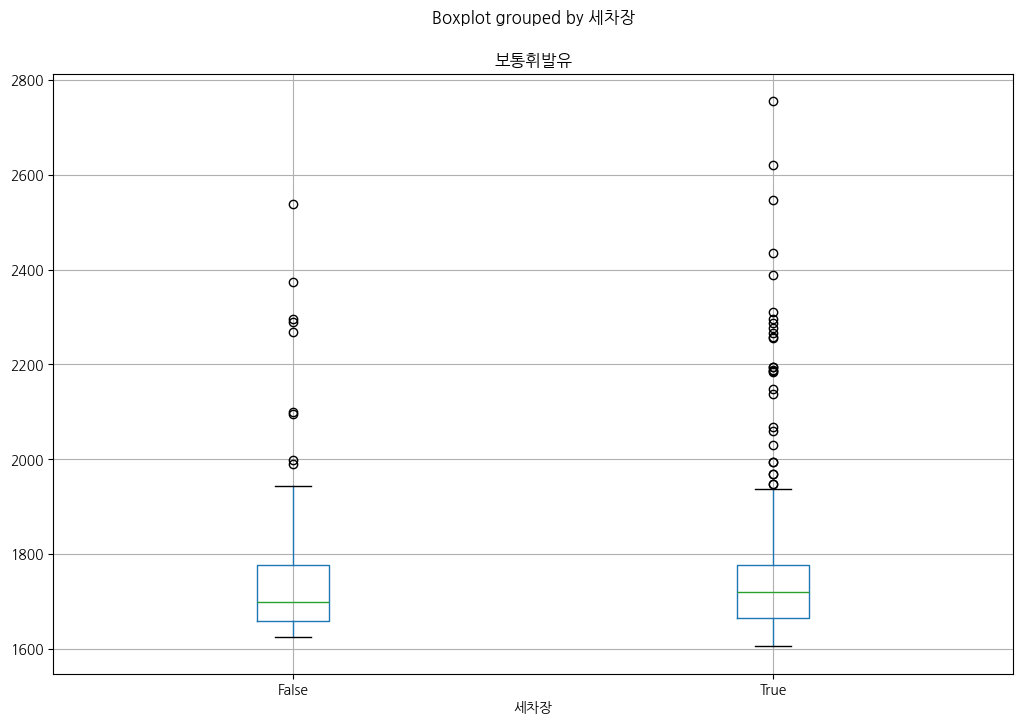

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

gas_station_data.boxplot(column="보통휘발유", by="세차장", figsize=(12, 8))

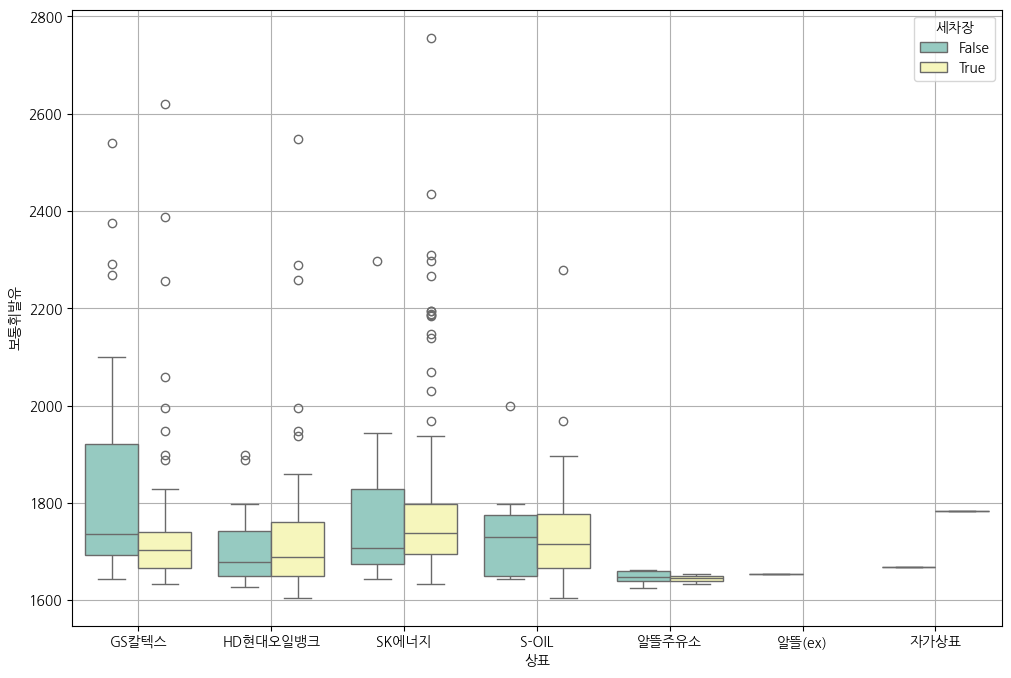

In [45]:
# plt.figure(figsize=(12,8))
# sns.boxplot(x="상표", y="보통휘발유", hue="세차장", data=df, palette="Set3")
# plt.grid(True)
# plt.show()

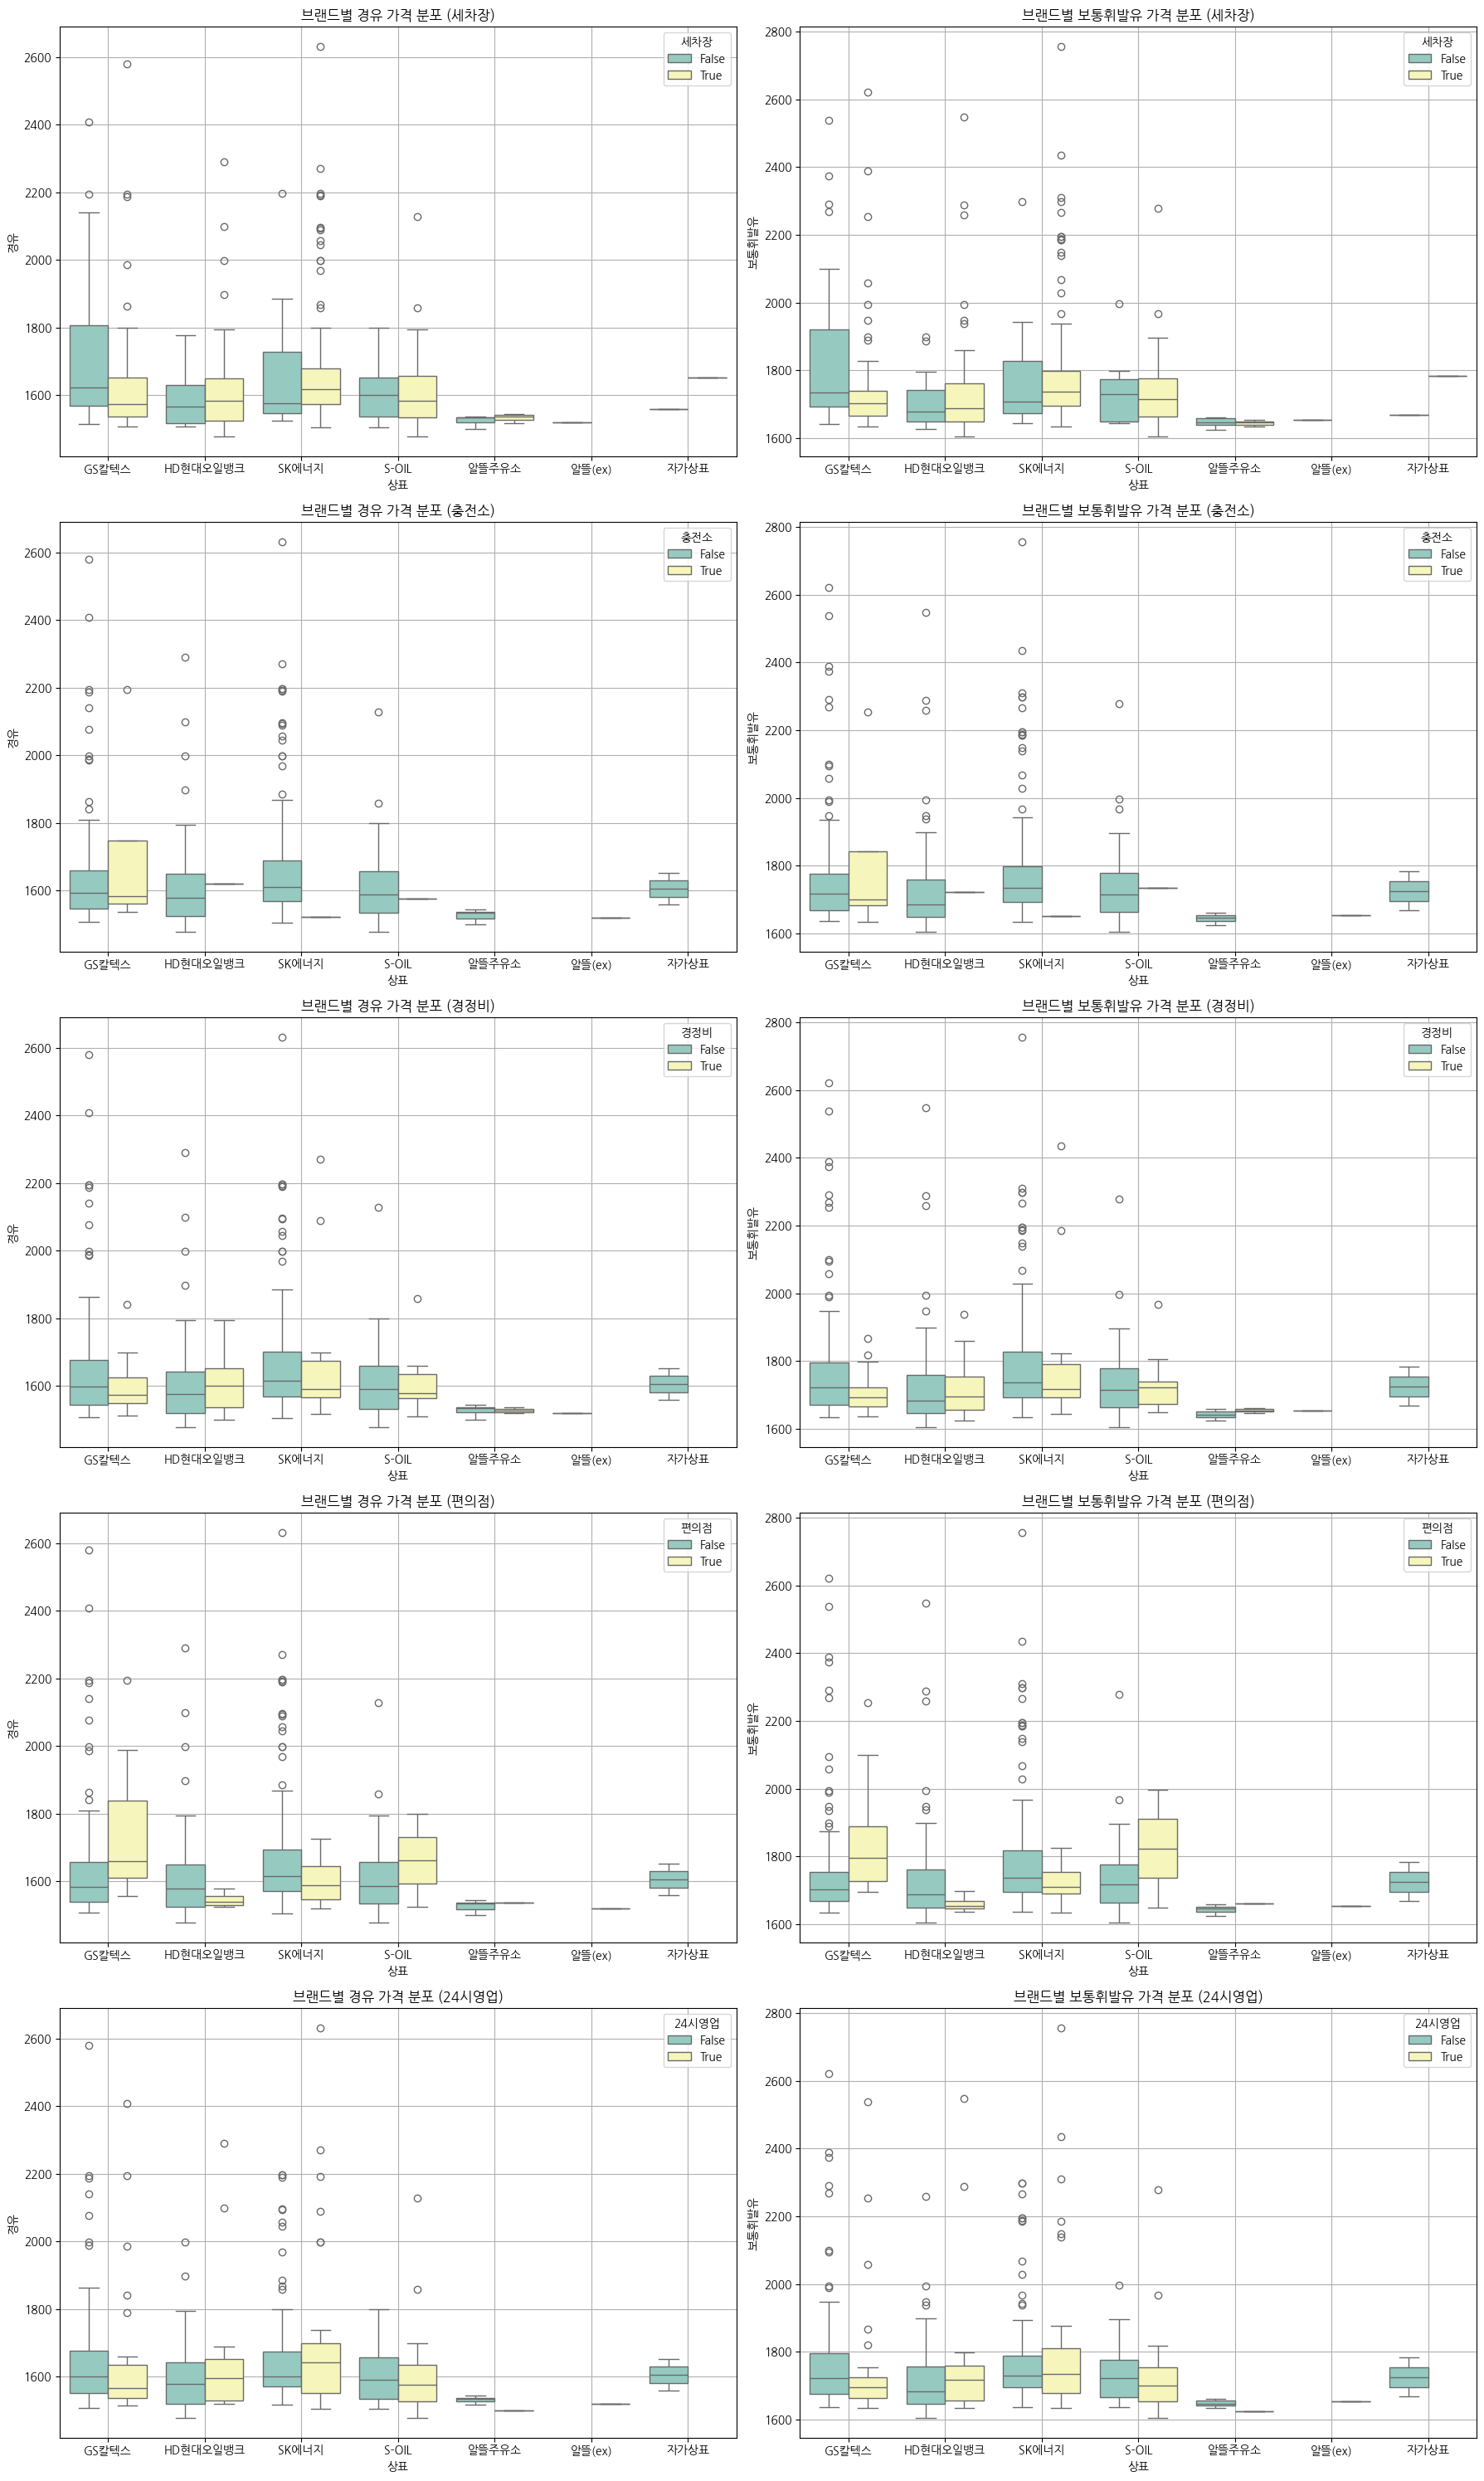

In [47]:
# 그래프 설정 (5행 2열)
fig, axes = plt.subplots(5, 2, figsize=(18, 30))  # 총 10개의 그래프 (5x2)

# 비교할 연료 및 상세 조건 리스트
fuel_types = ["경유", "보통휘발유"]
detail_types = ["세차장", "충전소", "경정비", "편의점", "24시영업"]

# 그래프 생성
for i, detail in enumerate(detail_types):  # 5개의 상세 조건 반복
    for j, fuel in enumerate(fuel_types):  # 2개의 연료 반복
        row, col = i, j  # 5x2 행렬로 정렬
        sns.boxplot(x="상표", y=fuel, hue=detail, data=gas_station_data, palette="Set3", ax=axes[row, col])
        axes[row, col].set_title(f"브랜드별 {fuel} 가격 분포 ({detail})")
        axes[row, col].grid(True)

# 그래프 간격 조정
plt.tight_layout()
plt.show()

### 지도시각화

In [48]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [53]:
import numpy as np

gu_premium_data = pd.pivot_table(data=gas_premium, index="구", values="고급휘발유", aggfunc=np.mean)
gu_premium_data.head()

,고급휘발유
구,
강남구,2176.000000
강동구,1959.625000
강북구,1849.000000
강서구,1906.125000
관악구,1967.833333


In [55]:
gu_reqular_data = pd.pivot_table(data=gas_station_data, index="구", values="보통휘발유", aggfunc=np.mean)
gu_reqular_data.head()

,보통휘발유
구,
강남구,1945.833333
강동구,1788.230769
강북구,1671.200000
강서구,1704.818182
관악구,1749.357143


In [57]:
gu_diesel_data = pd.pivot_table(data=gas_station_data, index="구", values="경유", aggfunc=np.mean)
gu_diesel_data.head()

,경유
구,
강남구,1830.733333
강동구,1662.769231
강북구,1534.600000
강서구,1574.454545
관악구,1621.928571


In [59]:
import numpy as np

gu_kerosene_data = pd.pivot_table(data=kerosene, index="구", values="실내등유", aggfunc=np.mean)
gu_kerosene_data.head()

,실내등유
구,
강남구,1741.500000
강동구,1599.750000
강북구,1440.000000
강서구,1534.142857
관악구,1411.400000


In [61]:
import folium
import json

geo_path = "../data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [67]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")
setting = folium.Choropleth(
    geo_data=geo_str,
    data=gu_premium_data,
    columns=[gu_premium_data.index, "고급휘발유"],
    key_on="feature.id",
    fill_color="PuRd"
)

setting.add_to(map1)
map1

In [68]:
map2 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")
setting = folium.Choropleth(
    geo_data=geo_str,
    data=gu_reqular_data,
    columns=[gu_reqular_data.index, "보통휘발유"],
    key_on="feature.id",
    fill_color="PuRd"
)

setting.add_to(map2)
map2

In [69]:
map3 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")
setting = folium.Choropleth(
    geo_data=geo_str,
    data=gu_diesel_data,
    columns=[gu_diesel_data.index, "경유"],
    key_on="feature.id",
    fill_color="PuRd"
)

setting.add_to(map3)
map3

In [70]:
map4 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")
setting = folium.Choropleth(
    geo_data=geo_str,
    data=gu_kerosene_data,
    columns=[gu_kerosene_data.index, "실내등유"],
    key_on="feature.id",
    fill_color="PuRd"
)

setting.add_to(map4)
map4